### Data

In [ ]:
pip install Sastrawi

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
data= pd.read_csv('dataset.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,komentar
0,nangkep bjorka ngakak guling guling kalo nangk...
1,kalo ngobrol shootnya dua2nya akan lebih dinik...
2,passwd admin1234
3,yg diundang si paling hacker kyk gak ada binta...
4,volume ny kurng gde om
...,...
1993,aku dari awal berminat untuk diretas mau giman...
1994,polisi aneh emang
1995,undung bahlur dong om gimana minyak di sell da...
1996,ketawa aja karna dari tubuh polri katanya ada ...


In [ ]:
df=data.iloc[0:250]
df

,komentar
0,nangkep bjorka ngakak guling guling kalo nangk...
1,kalo ngobrol shootnya dua2nya akan lebih dinik...
2,passwd admin1234
3,yg diundang si paling hacker kyk gak ada binta...
4,volume ny kurng gde om
...,...
245,om ded kpn ni bahas yg sangat ramai mengenai i...
246,sepertinya bjorka ini akun nya di pegang banya...
247,kemapuan untuk blokir live tiktok aja cepet ur...
248,emg dasarnya pemerintah konoha tdk mau ada yg ...


### Preprocessing

#### Kamus

In [ ]:
normalize_kamus = {
    # Kata umum yang sudah ada
    'aja': 'saja',
    'gitu': 'begitu',
    'kek': 'seperti',
    'klo': 'kalau',
    'klu': 'kalau',
    'kalo': 'kalau',
    'yg': 'yang',
    'tu': 'itu',
    'tdur': 'tidur',
    'nangkep': 'menangkap',
    'nangkip': 'menangkap',
    'nangkepnya': 'menangkapnya',
    'mrka': 'mereka',
    'gaib': 'ghaib',
    'qt': 'kita',
    'boro2': 'jangankan',
    'g': 'tidak',
    'ga': 'tidak',
    'gak': 'tidak',
    'ngakak': 'tertawa',
    'pdhl': 'padahal',
    'bgt': 'banget',
    'bnyk': 'banyak',
    'gk': 'tidak',
    'udh': 'sudah',
    'lg': 'lagi',
    'd': 'di',
    'jd': 'jadi',
    'tbtb': 'tiba-tiba',
    'gtu':'gitu',
    # Slang/typo khusus dari data
    'pulisic': 'polisi',
    'pulisicnya': 'polisinya',
    'polisi': 'polisi',
    'bjirrr': 'bjorka',
    'bjirka': 'bjorka',
    'om': 'paman',
    'deddy': 'Dedi',
    'wa': 'whatsaapp',
    'twitt':'cuitan',
    'yah':'ya',
    'biorka': 'bjorka',
    'konohahah': 'konoha',
    'kudu':'harus',
    'tuh':'itu',
    'pahlawn':'pahlawan',


    # --- Tambahan Kata Umum & Singkatan ---
    'krn': 'karena',
    'dr': 'dari',
    'jd': 'jadi',
    'trlalu': 'terlalu',
    'knp': 'kenapa',
    'sampe': 'sampai',
    'smp': 'sampai',
    'msh': 'masih',
    'trs': 'terus',
    'dlm': 'dalam',
    'bkin': 'membuat',
    'skrg': 'sekarang',
    'tmn': 'teman',
    'bgs': 'bagus',
    'kpn': 'kapan',
    'dmn': 'di mana',
    'bs': 'bisa',
    'spt': 'seperti',
    'mksd': 'maksud',
    'bullyan': 'bully',
    'cmn': 'cuma',
    'cm': 'cuma',
    'omm': 'om',
    'tau': 'tahu',
    'mending': 'lebih baik',
    'bgtu': 'begitu',
    'klo': 'kalau',
    'sy': 'saya',
    'km': 'kamu',
    'hrs': 'harus',
    'mngkn': 'mungkin',
    'ngga': 'tidak',
    'kdg': 'kadang',
    'bkn': 'bukan',
    'gmn': 'bagaimana',
    'gmana': 'bagaimana',
    'wkwk': 'tertawa', # Kata ekspresi
    'wkwkwk': 'tertawa',
    'kwkwkwk': 'tertawa',
    'hahaha': 'tertawa',
    '	hihihihihihi' : 'tertawa',
    'haha': 'tertawa',
    'btw': 'ngomong-ngomong',
    'thx': 'terima kasih',
    'woy':'hei',
    'k': 'ke',
    'pake': 'pakai',
    'kyk': 'seperti',
    'dl': 'dulu',
    'dlu': 'dulu',
    'baca': 'membaca',
    'ngerti': 'mengerti',
    'bknnya': 'bukannya',
    'blg': 'bilang',
    'tllu': 'terlalu',
    'sdh': 'sudah',
    'sbg': 'sebagai',
    'trjdi': 'terjadi',
    'tggu': 'tunggu',
    'sbnrnya': 'sebenarnya',
    'tp': 'tapi',
    'pkoknya': 'pokoknya',
    'gw':'aku',
    'sihhh':'ya',
    'ngundang':'undang',
    'thun':'tahun',
    'ajah':'saja',
    'dengerin': 'dengar',
    'dong': '',
    'sangat2': 'sangat',
    'emang': 'memang',
    'passwd': 'sandi'
}

#### Data Cleaning

In [ ]:
def normalize_word(text):
    return ' '.join([normalize_kamus[word] if word in normalize_kamus else word for word in str(text).split()])

df['normalize_word']= data['komentar'].apply(normalize_word)
df

/tmp/ipython-input-2451156676.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normalize_word']= data['komentar'].apply(normalize_word)


,komentar,normalize_word
0,nangkep bjorka ngakak guling guling kalo nangk...,menangkap bjorka tertawa guling guling kalau m...
1,kalo ngobrol shootnya dua2nya akan lebih dinik...,kalau ngobrol shootnya dua2nya akan lebih dini...
2,passwd admin1234,sandi admin1234
3,yg diundang si paling hacker kyk gak ada binta...,yang diundang si paling hacker seperti tidak a...
4,volume ny kurng gde om,volume ny kurng gde paman
...,...,...
245,om ded kpn ni bahas yg sangat ramai mengenai i...,paman ded kapan ni bahas yang sangat ramai men...
246,sepertinya bjorka ini akun nya di pegang banya...,sepertinya bjorka ini akun nya di pegang banya...
247,kemapuan untuk blokir live tiktok aja cepet ur...,kemapuan untuk blokir live tiktok saja cepet u...
248,emg dasarnya pemerintah konoha tdk mau ada yg ...,emg dasarnya pemerintah konoha tdk mau ada yan...


In [ ]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

df['normalize_word'] = df['normalize_word'].apply(remove_punctuation)
df

/tmp/ipython-input-445737802.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normalize_word'] = df['normalize_word'].apply(remove_punctuation)


,komentar,normalize_word
0,nangkep bjorka ngakak guling guling kalo nangk...,menangkap bjorka tertawa guling guling kalau m...
1,kalo ngobrol shootnya dua2nya akan lebih dinik...,kalau ngobrol shootnya dua2nya akan lebih dini...
2,passwd admin1234,sandi admin1234
3,yg diundang si paling hacker kyk gak ada binta...,yang diundang si paling hacker seperti tidak a...
4,volume ny kurng gde om,volume ny kurng gde paman
...,...,...
245,om ded kpn ni bahas yg sangat ramai mengenai i...,paman ded kapan ni bahas yang sangat ramai men...
246,sepertinya bjorka ini akun nya di pegang banya...,sepertinya bjorka ini akun nya di pegang banya...
247,kemapuan untuk blokir live tiktok aja cepet ur...,kemapuan untuk blokir live tiktok saja cepet u...
248,emg dasarnya pemerintah konoha tdk mau ada yg ...,emg dasarnya pemerintah konoha tdk mau ada yan...


In [ ]:
def remove_numbers_special_chars(text):
    # Keep only letters and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))
    return text

df['normalize_word'] = df['normalize_word'].apply(remove_numbers_special_chars)
df

/tmp/ipython-input-1245221185.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normalize_word'] = df['normalize_word'].apply(remove_numbers_special_chars)


,komentar,normalize_word
0,nangkep bjorka ngakak guling guling kalo nangk...,menangkap bjorka tertawa guling guling kalau m...
1,kalo ngobrol shootnya dua2nya akan lebih dinik...,kalau ngobrol shootnya duanya akan lebih dinik...
2,passwd admin1234,sandi admin
3,yg diundang si paling hacker kyk gak ada binta...,yang diundang si paling hacker seperti tidak a...
4,volume ny kurng gde om,volume ny kurng gde paman
...,...,...
245,om ded kpn ni bahas yg sangat ramai mengenai i...,paman ded kapan ni bahas yang sangat ramai men...
246,sepertinya bjorka ini akun nya di pegang banya...,sepertinya bjorka ini akun nya di pegang banya...
247,kemapuan untuk blokir live tiktok aja cepet ur...,kemapuan untuk blokir live tiktok saja cepet u...
248,emg dasarnya pemerintah konoha tdk mau ada yg ...,emg dasarnya pemerintah konoha tdk mau ada yan...


In [ ]:
def normalize_whitespace(text):
    text = re.sub(r'\s+', ' ', str(text)).strip()
    return text

df['normalize_word'] = df['normalize_word'].apply(normalize_whitespace)
df

/tmp/ipython-input-2925661296.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normalize_word'] = df['normalize_word'].apply(normalize_whitespace)


,komentar,normalize_word
0,nangkep bjorka ngakak guling guling kalo nangk...,menangkap bjorka tertawa guling guling kalau m...
1,kalo ngobrol shootnya dua2nya akan lebih dinik...,kalau ngobrol shootnya duanya akan lebih dinik...
2,passwd admin1234,sandi admin
3,yg diundang si paling hacker kyk gak ada binta...,yang diundang si paling hacker seperti tidak a...
4,volume ny kurng gde om,volume ny kurng gde paman
...,...,...
245,om ded kpn ni bahas yg sangat ramai mengenai i...,paman ded kapan ni bahas yang sangat ramai men...
246,sepertinya bjorka ini akun nya di pegang banya...,sepertinya bjorka ini akun nya di pegang banya...
247,kemapuan untuk blokir live tiktok aja cepet ur...,kemapuan untuk blokir live tiktok saja cepet u...
248,emg dasarnya pemerintah konoha tdk mau ada yg ...,emg dasarnya pemerintah konoha tdk mau ada yan...


In [ ]:
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

def remove_stopwords(text):
    return stopword_remover.remove(str(text))

df['normalize_word'] = df['normalize_word'].apply(remove_stopwords)
df

/tmp/ipython-input-2789947353.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normalize_word'] = df['normalize_word'].apply(remove_stopwords)


,komentar,normalize_word
0,nangkep bjorka ngakak guling guling kalo nangk...,menangkap bjorka tertawa guling guling kalau m...
1,kalo ngobrol shootnya dua2nya akan lebih dinik...,kalau ngobrol shootnya duanya lebih dinikmati
2,passwd admin1234,sandi admin
3,yg diundang si paling hacker kyk gak ada binta...,diundang si paling hacker tidak bintang tamu
4,volume ny kurng gde om,volume ny kurng gde paman
...,...,...
245,om ded kpn ni bahas yg sangat ramai mengenai i...,paman ded kapan ni bahas sangat ramai mengenai...
246,sepertinya bjorka ini akun nya di pegang banya...,sepertinya bjorka akun nya pegang banyak orang...
247,kemapuan untuk blokir live tiktok aja cepet ur...,kemapuan blokir live tiktok cepet urusin keroc...
248,emg dasarnya pemerintah konoha tdk mau ada yg ...,emg dasarnya pemerintah konoha tdk mau yang pi...


In [ ]:
def tokenize_text(text):
    return word_tokenize(str(text))

df['tokens'] = df['normalize_word'].apply(tokenize_text)
df

/tmp/ipython-input-510785994.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['normalize_word'].apply(tokenize_text)


,komentar,normalize_word,tokens
0,nangkep bjorka ngakak guling guling kalo nangk...,menangkap bjorka tertawa guling guling kalau m...,"[menangkap, bjorka, tertawa, guling, guling, k..."
1,kalo ngobrol shootnya dua2nya akan lebih dinik...,kalau ngobrol shootnya duanya lebih dinikmati,"[kalau, ngobrol, shootnya, duanya, lebih, dini..."
2,passwd admin1234,sandi admin,"[sandi, admin]"
3,yg diundang si paling hacker kyk gak ada binta...,diundang si paling hacker tidak bintang tamu,"[diundang, si, paling, hacker, tidak, bintang,..."
4,volume ny kurng gde om,volume ny kurng gde paman,"[volume, ny, kurng, gde, paman]"
...,...,...,...
245,om ded kpn ni bahas yg sangat ramai mengenai i...,paman ded kapan ni bahas sangat ramai mengenai...,"[paman, ded, kapan, ni, bahas, sangat, ramai, ..."
246,sepertinya bjorka ini akun nya di pegang banya...,sepertinya bjorka akun nya pegang banyak orang...,"[sepertinya, bjorka, akun, nya, pegang, banyak..."
247,kemapuan untuk blokir live tiktok aja cepet ur...,kemapuan blokir live tiktok cepet urusin keroc...,"[kemapuan, blokir, live, tiktok, cepet, urusin..."
248,emg dasarnya pemerintah konoha tdk mau ada yg ...,emg dasarnya pemerintah konoha tdk mau yang pi...,"[emg, dasarnya, pemerintah, konoha, tdk, mau, ..."


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory_stem = StemmerFactory()
stemmer = factory_stem.create_stemmer()

def stem_tokens(tokens):
    if isinstance(tokens, list):
        stemmed_tokens = [stemmer.stem(word) for word in tokens]
        return ' '.join(stemmed_tokens)
    return str(tokens) # Handle cases where it might not be a list

df['stemmed_text'] = df['tokens'].apply(stem_tokens)
df

/tmp/ipython-input-4126694397.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stemmed_text'] = df['tokens'].apply(stem_tokens)


,komentar,normalize_word,tokens,stemmed_text
0,nangkep bjorka ngakak guling guling kalo nangk...,menangkap bjorka tertawa guling guling kalau m...,"[menangkap, bjorka, tertawa, guling, guling, k...",tangkap bjorka tertawa guling guling kalau tan...
1,kalo ngobrol shootnya dua2nya akan lebih dinik...,kalau ngobrol shootnya duanya lebih dinikmati,"[kalau, ngobrol, shootnya, duanya, lebih, dini...",kalau ngobrol shootnya dua lebih nikmat
2,passwd admin1234,sandi admin,"[sandi, admin]",sandi admin
3,yg diundang si paling hacker kyk gak ada binta...,diundang si paling hacker tidak bintang tamu,"[diundang, si, paling, hacker, tidak, bintang,...",undang si paling hacker tidak bintang tamu
4,volume ny kurng gde om,volume ny kurng gde paman,"[volume, ny, kurng, gde, paman]",volume ny kurng gde paman
...,...,...,...,...
245,om ded kpn ni bahas yg sangat ramai mengenai i...,paman ded kapan ni bahas sangat ramai mengenai...,"[paman, ded, kapan, ni, bahas, sangat, ramai, ...",paman ded kapan ni bahas sangat ramai kena ija...
246,sepertinya bjorka ini akun nya di pegang banya...,sepertinya bjorka akun nya pegang banyak orang...,"[sepertinya, bjorka, akun, nya, pegang, banyak...",seperti bjorka akun nya pegang banyak orang le...
247,kemapuan untuk blokir live tiktok aja cepet ur...,kemapuan blokir live tiktok cepet urusin keroc...,"[kemapuan, blokir, live, tiktok, cepet, urusin...",kemapuan blokir live tiktok cepet urusin keroc...
248,emg dasarnya pemerintah konoha tdk mau ada yg ...,emg dasarnya pemerintah konoha tdk mau yang pi...,"[emg, dasarnya, pemerintah, konoha, tdk, mau, ...",emg dasar perintah konoha tdk mau yang pintar ...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(df['stemmed_text'])

print("TF-IDF matrix shape:", tfidf_matrix.shape)
print("First 5 TF-IDF features for the first document:\n", tfidf_matrix[0, :5].toarray())


tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.to_csv('tfidf_matrix.csv', index=False)
print("TF-IDF matrix saved to tfidf_matrix.csv")

TF-IDF matrix shape: (250, 1123)
First 5 TF-IDF features for the first document:
 [[0. 0. 0. 0. 0.]]
TF-IDF matrix saved to tfidf_matrix.csv


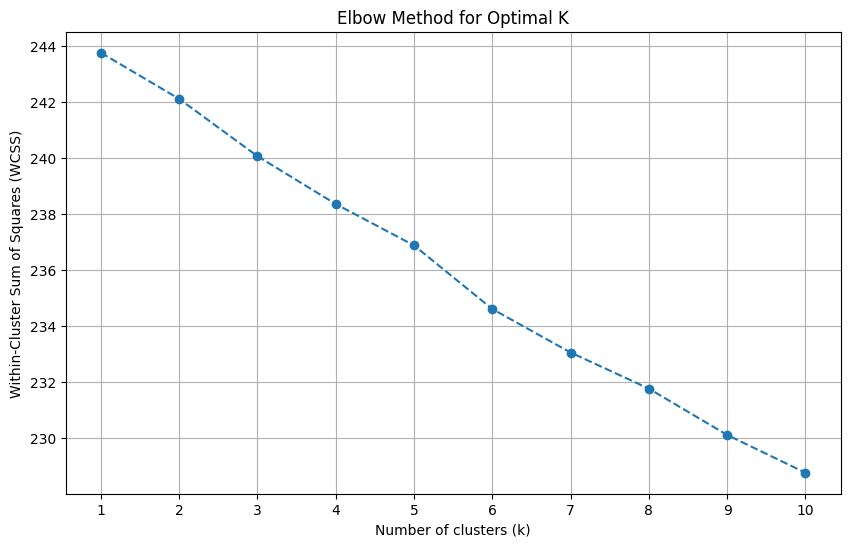

WCSS values calculated for k from 1 to 10.


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

k_range = range(1, 11)


for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

print("WCSS values calculated for k from 1 to 10.")

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init='auto')
kmeans.fit(tfidf_matrix)
df['cluster_label'] = kmeans.labels_
df.head()

/tmp/ipython-input-1299142118.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_label'] = kmeans.labels_


,komentar,normalize_word,tokens,stemmed_text,cluster_label
0,nangkep bjorka ngakak guling guling kalo nangk...,menangkap bjorka tertawa guling guling kalau m...,"[menangkap, bjorka, tertawa, guling, guling, k...",tangkap bjorka tertawa guling guling kalau tan...,2
1,kalo ngobrol shootnya dua2nya akan lebih dinik...,kalau ngobrol shootnya duanya lebih dinikmati,"[kalau, ngobrol, shootnya, duanya, lebih, dini...",kalau ngobrol shootnya dua lebih nikmat,1
2,passwd admin1234,sandi admin,"[sandi, admin]",sandi admin,1
3,yg diundang si paling hacker kyk gak ada binta...,diundang si paling hacker tidak bintang tamu,"[diundang, si, paling, hacker, tidak, bintang,...",undang si paling hacker tidak bintang tamu,1
4,volume ny kurng gde om,volume ny kurng gde paman,"[volume, ny, kurng, gde, paman]",volume ny kurng gde paman,1


## Analyze cluster results

In [ ]:
print("Distribution of comments across clusters:")
print(df['cluster_label'].value_counts())

print("\n--- Sample comments for each cluster ---")
for i in sorted(df['cluster_label'].unique()):
    print(f"\n--- Sample comments for Cluster {i} ---")
    # Ensure there are enough samples before trying to sample 5
    if len(df[df['cluster_label'] == i]) >= 5:
        print(df[df['cluster_label'] == i]['komentar'].sample(5, random_state=42).tolist())
    else:
        print(df[df['cluster_label'] == i]['komentar'].tolist())

Distribution of comments across clusters:
cluster_label
1    108
2     99
0     43
Name: count, dtype: int64

--- Sample comments for each cluster ---

--- Sample comments for Cluster 0 ---
['alhamdulillahℙℝ𝕆𝔹𝔼𝕋855bikin hiburan lebih meaningful ceritanya relatable hadiahnya wow', 'polela kerja caper cuma foto doang kerja nyata nol main ani sni cepat dimanana dasar bangke manyalahgunakan hukum demi uang makanya perut nya buncit katak kendil', 'mamtab orang2 kyk gini yg harusnya masuk di dunia pemerintahan', '0030 wowℙℝ𝕆𝔹𝔼𝕋855beda banget ceritanya mengalir visualnya kece dan kemenangannya bikin hati melayang harus coba', 'gak nyangkaℙℝ𝕆𝔹𝔼𝕋855sekeren ini visualnya ciamik ceritanya penuh hikmah untungnya luar biasa']

--- Sample comments for Cluster 1 ---
['wadidaww', 'kata gen z cybereskrim afk', 'mungkin bisa jadi analogi yg sama antara influencer dan jurnalis hacker etis dan non etis', 'polisiii', 'apple bakal naik daun nih']

--- Sample comments for Cluster 2 ---
['bjorka jelas2 di kam

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init='auto')
kmeans.fit(tfidf_matrix)
df.loc[:, 'cluster_label'] = kmeans.labels_
df.head()

,komentar,normalize_word,tokens,stemmed_text,cluster_label
0,nangkep bjorka ngakak guling guling kalo nangk...,menangkap bjorka tertawa guling guling kalau m...,"[menangkap, bjorka, tertawa, guling, guling, k...",tangkap bjorka tertawa guling guling kalau tan...,2
1,kalo ngobrol shootnya dua2nya akan lebih dinik...,kalau ngobrol shootnya duanya lebih dinikmati,"[kalau, ngobrol, shootnya, duanya, lebih, dini...",kalau ngobrol shootnya dua lebih nikmat,1
2,passwd admin1234,sandi admin,"[sandi, admin]",sandi admin,1
3,yg diundang si paling hacker kyk gak ada binta...,diundang si paling hacker tidak bintang tamu,"[diundang, si, paling, hacker, tidak, bintang,...",undang si paling hacker tidak bintang tamu,1
4,volume ny kurng gde om,volume ny kurng gde paman,"[volume, ny, kurng, gde, paman]",volume ny kurng gde paman,1
